#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [53]:
from scipy.special import values
from setuptools.command.install import install


In [54]:
# !gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

In [55]:
import pandas as pd

df = pd.read_csv('/Users/gorazdfilipovski/PycharmProjects/VNP/LABS/lab2/bazicen/diabetes.csv')

In [56]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [57]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
171,6.0,134,70,23.0,130,35.4,0.542,29,1
55,1.0,73,50,10.0,0,23.0,0.248,21,0
549,4.0,189,110,31.0,0,28.5,0.680,37,0
565,2.0,95,54,14.0,88,26.1,0.748,22,0
739,1.0,102,74,0.0,0,39.5,0.293,42,1


# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [58]:
df.isnull().sum()/df["Glucose"].count()*100

Pregnancies                 1.822917
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

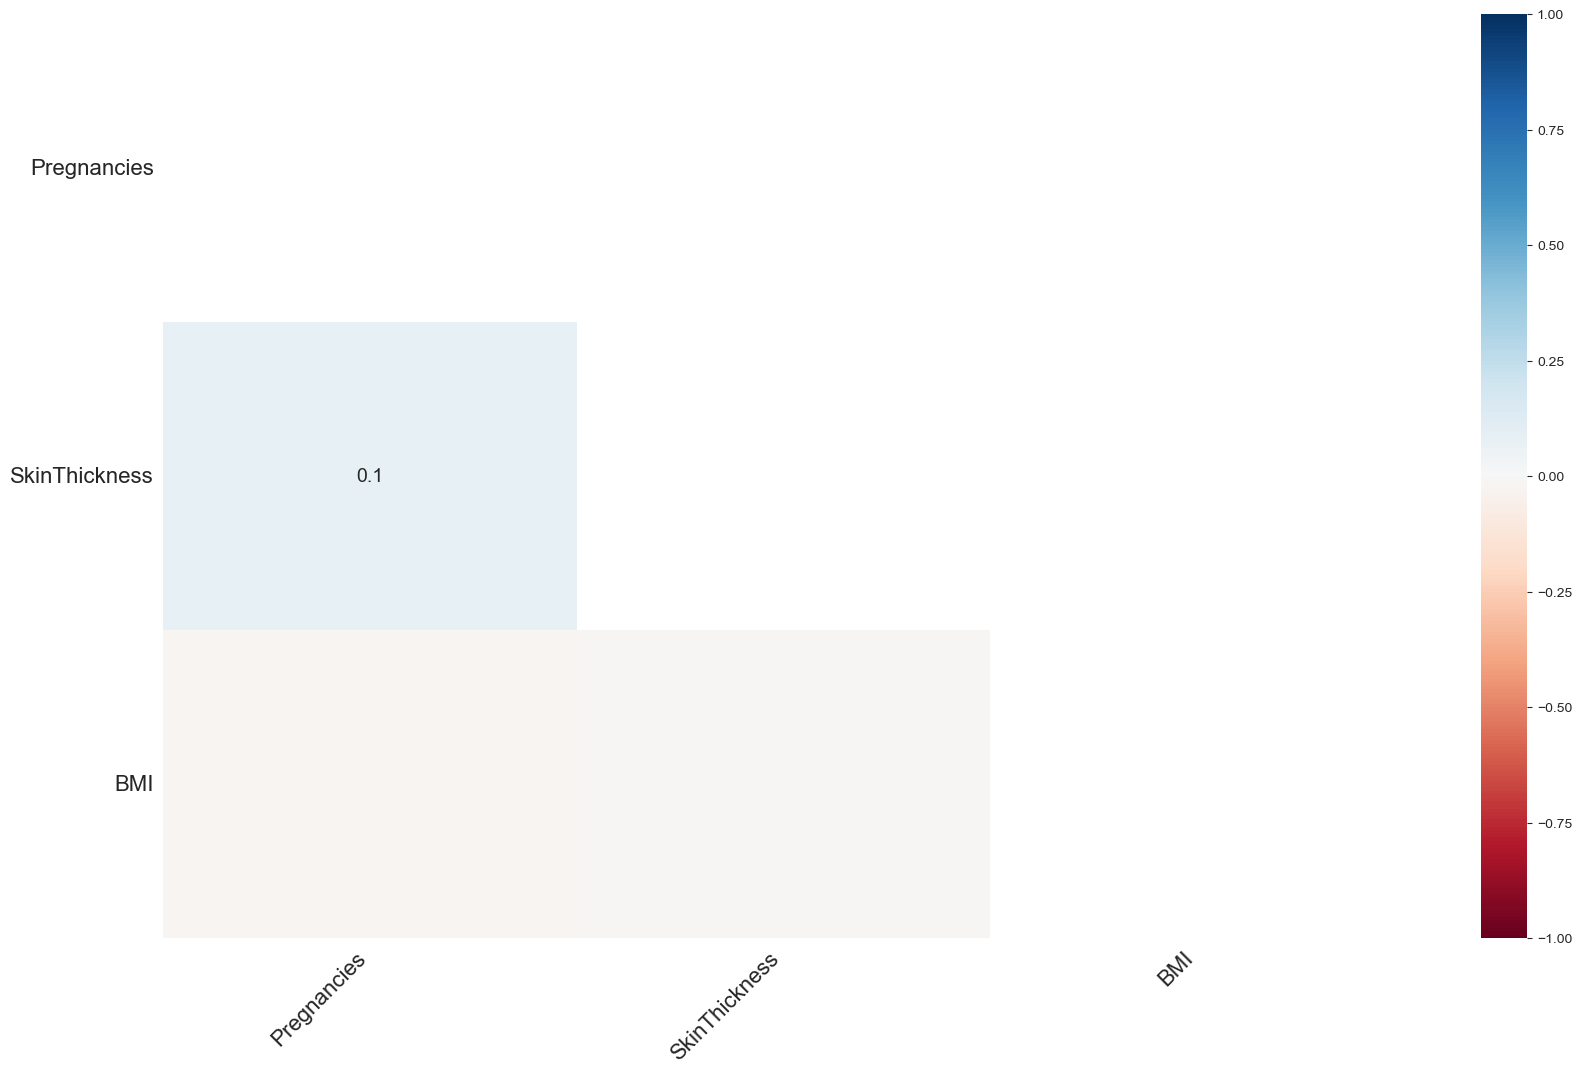

In [59]:
from matplotlib import pyplot as plt
import missingno as msno
msno.heatmap(df)
plt.show()

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

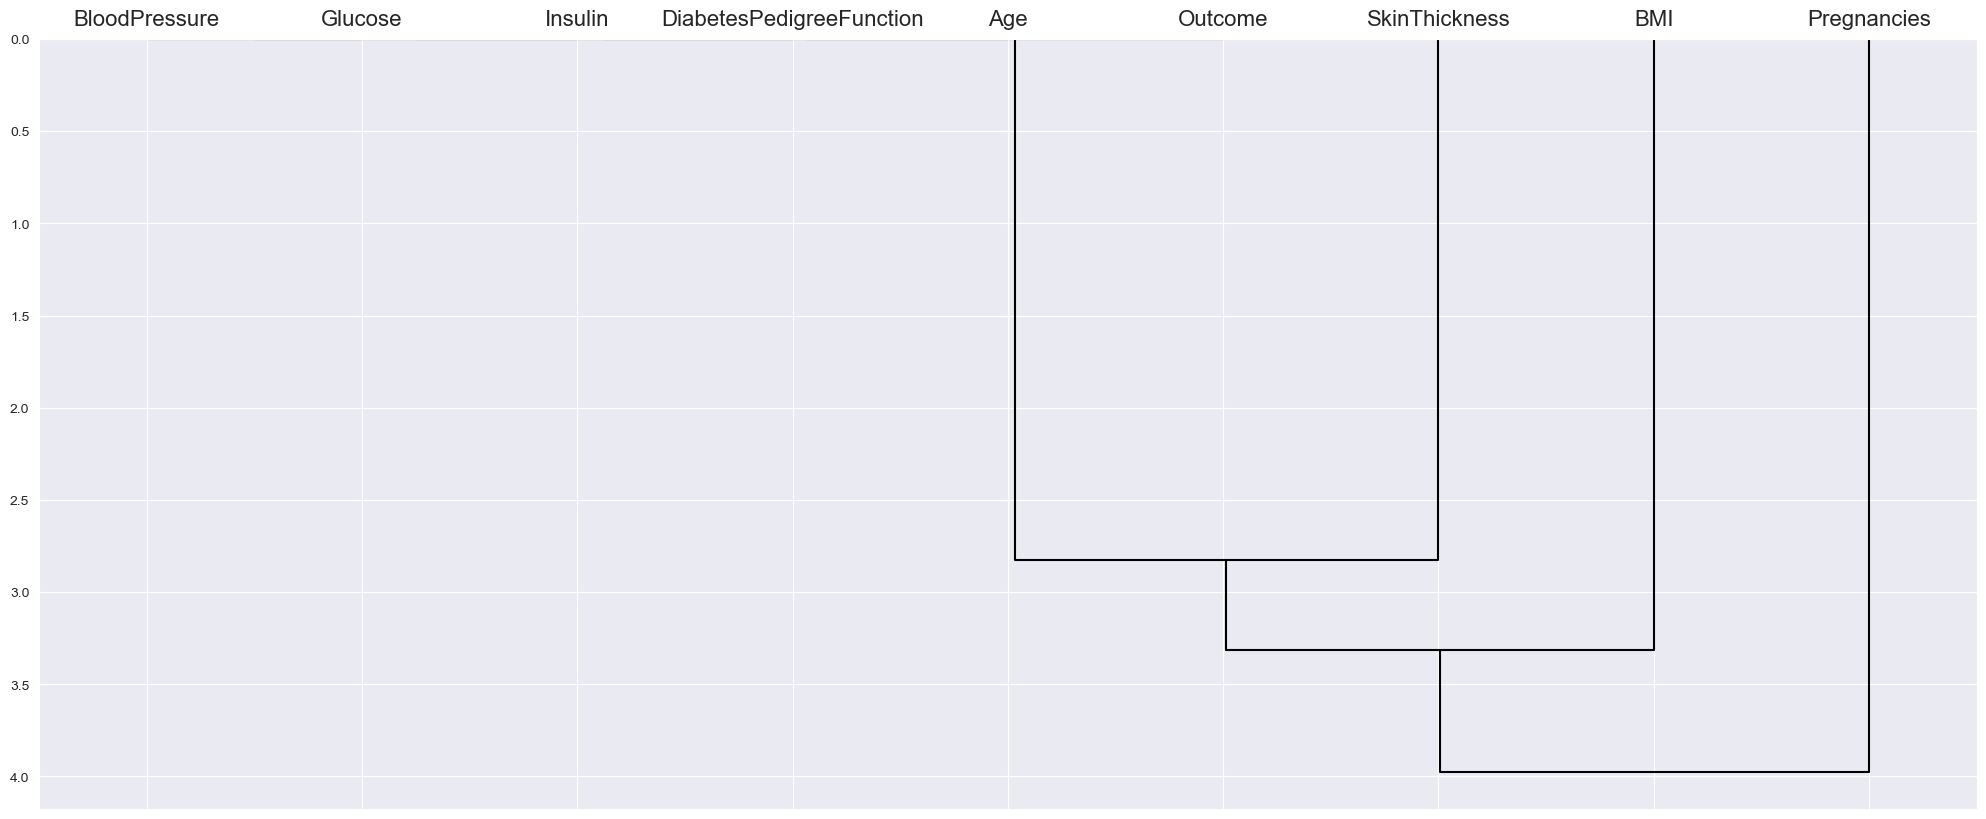

In [60]:
msno.dendrogram(df)
plt.show()

Visualize the missing values using Missingno library

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

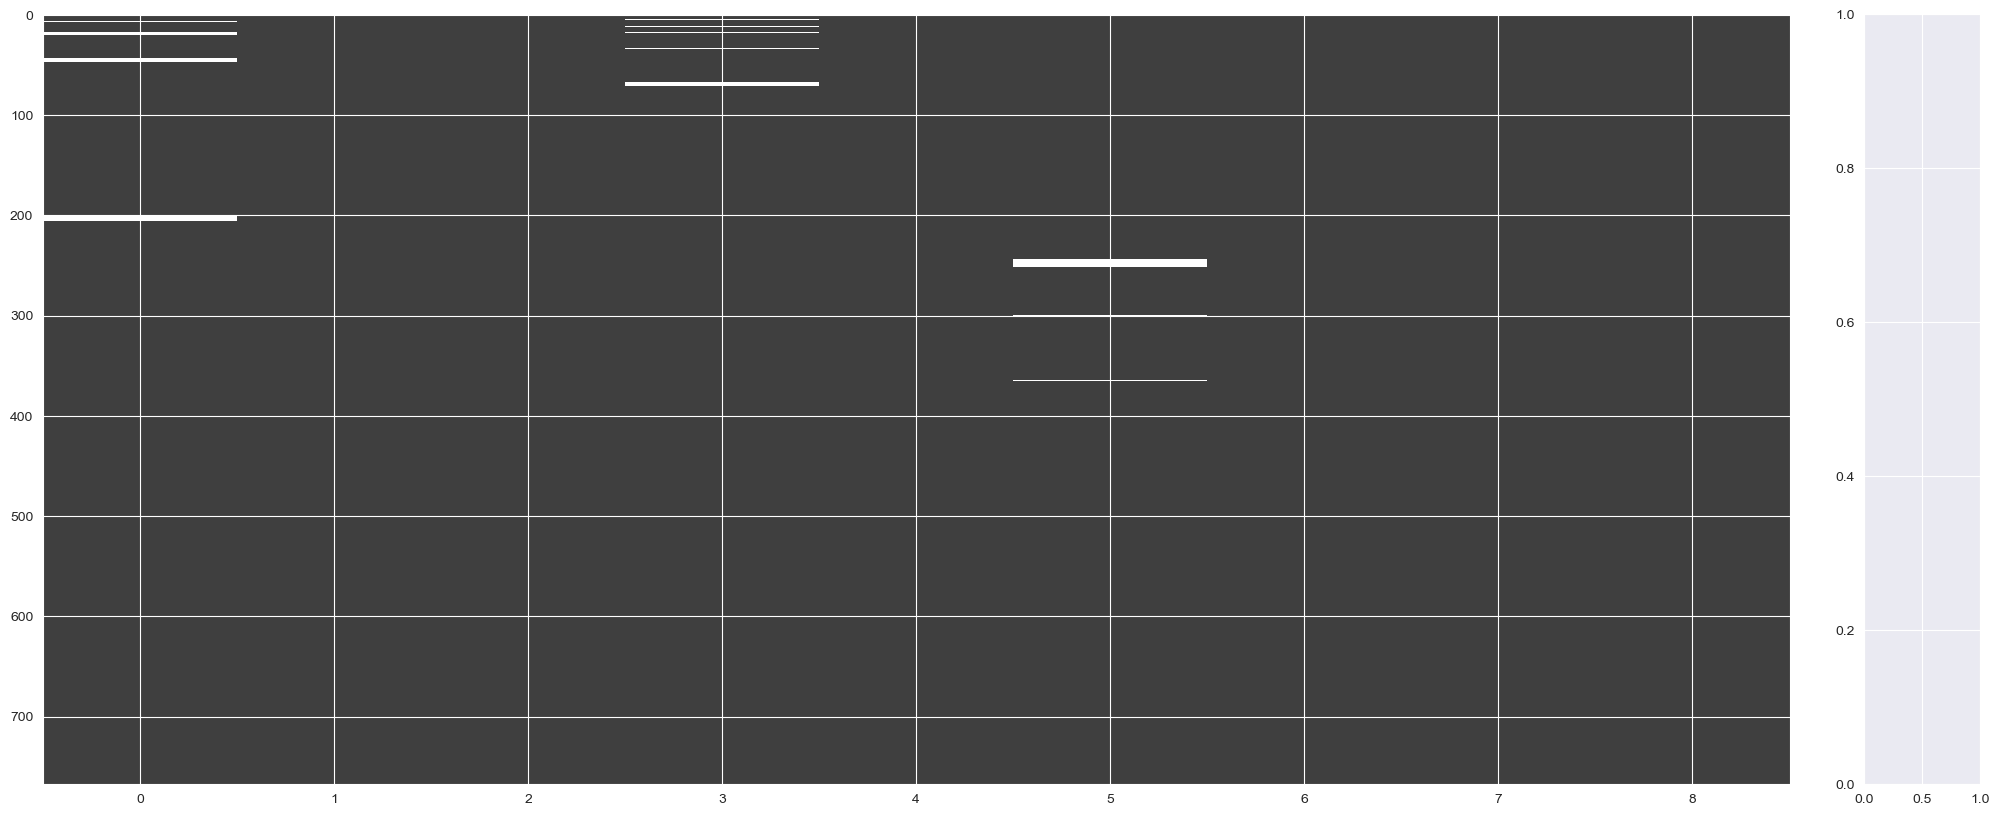

In [37]:
msno.matrix(df)
plt.show()

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

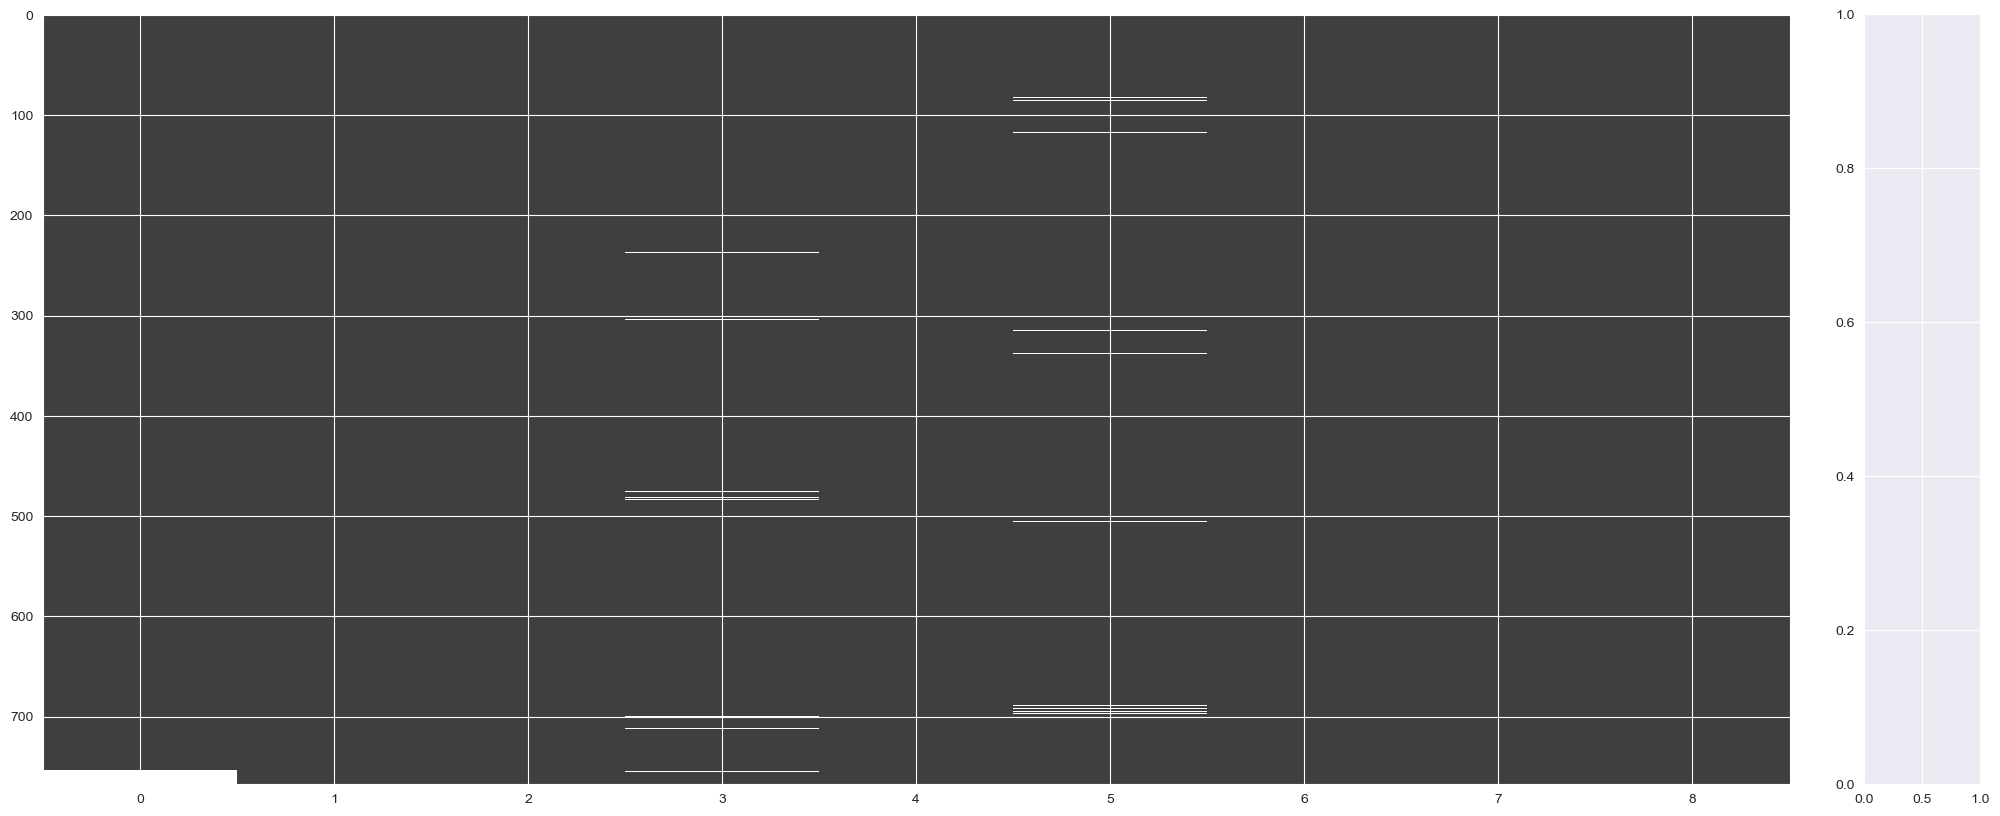

In [38]:
msno.matrix(df.sort_values('Pregnancies'))
plt.show()

In [ ]:
#add your code

## <font color = 'Orange'>Handle the missing values</font>

In [61]:
import seaborn as sns

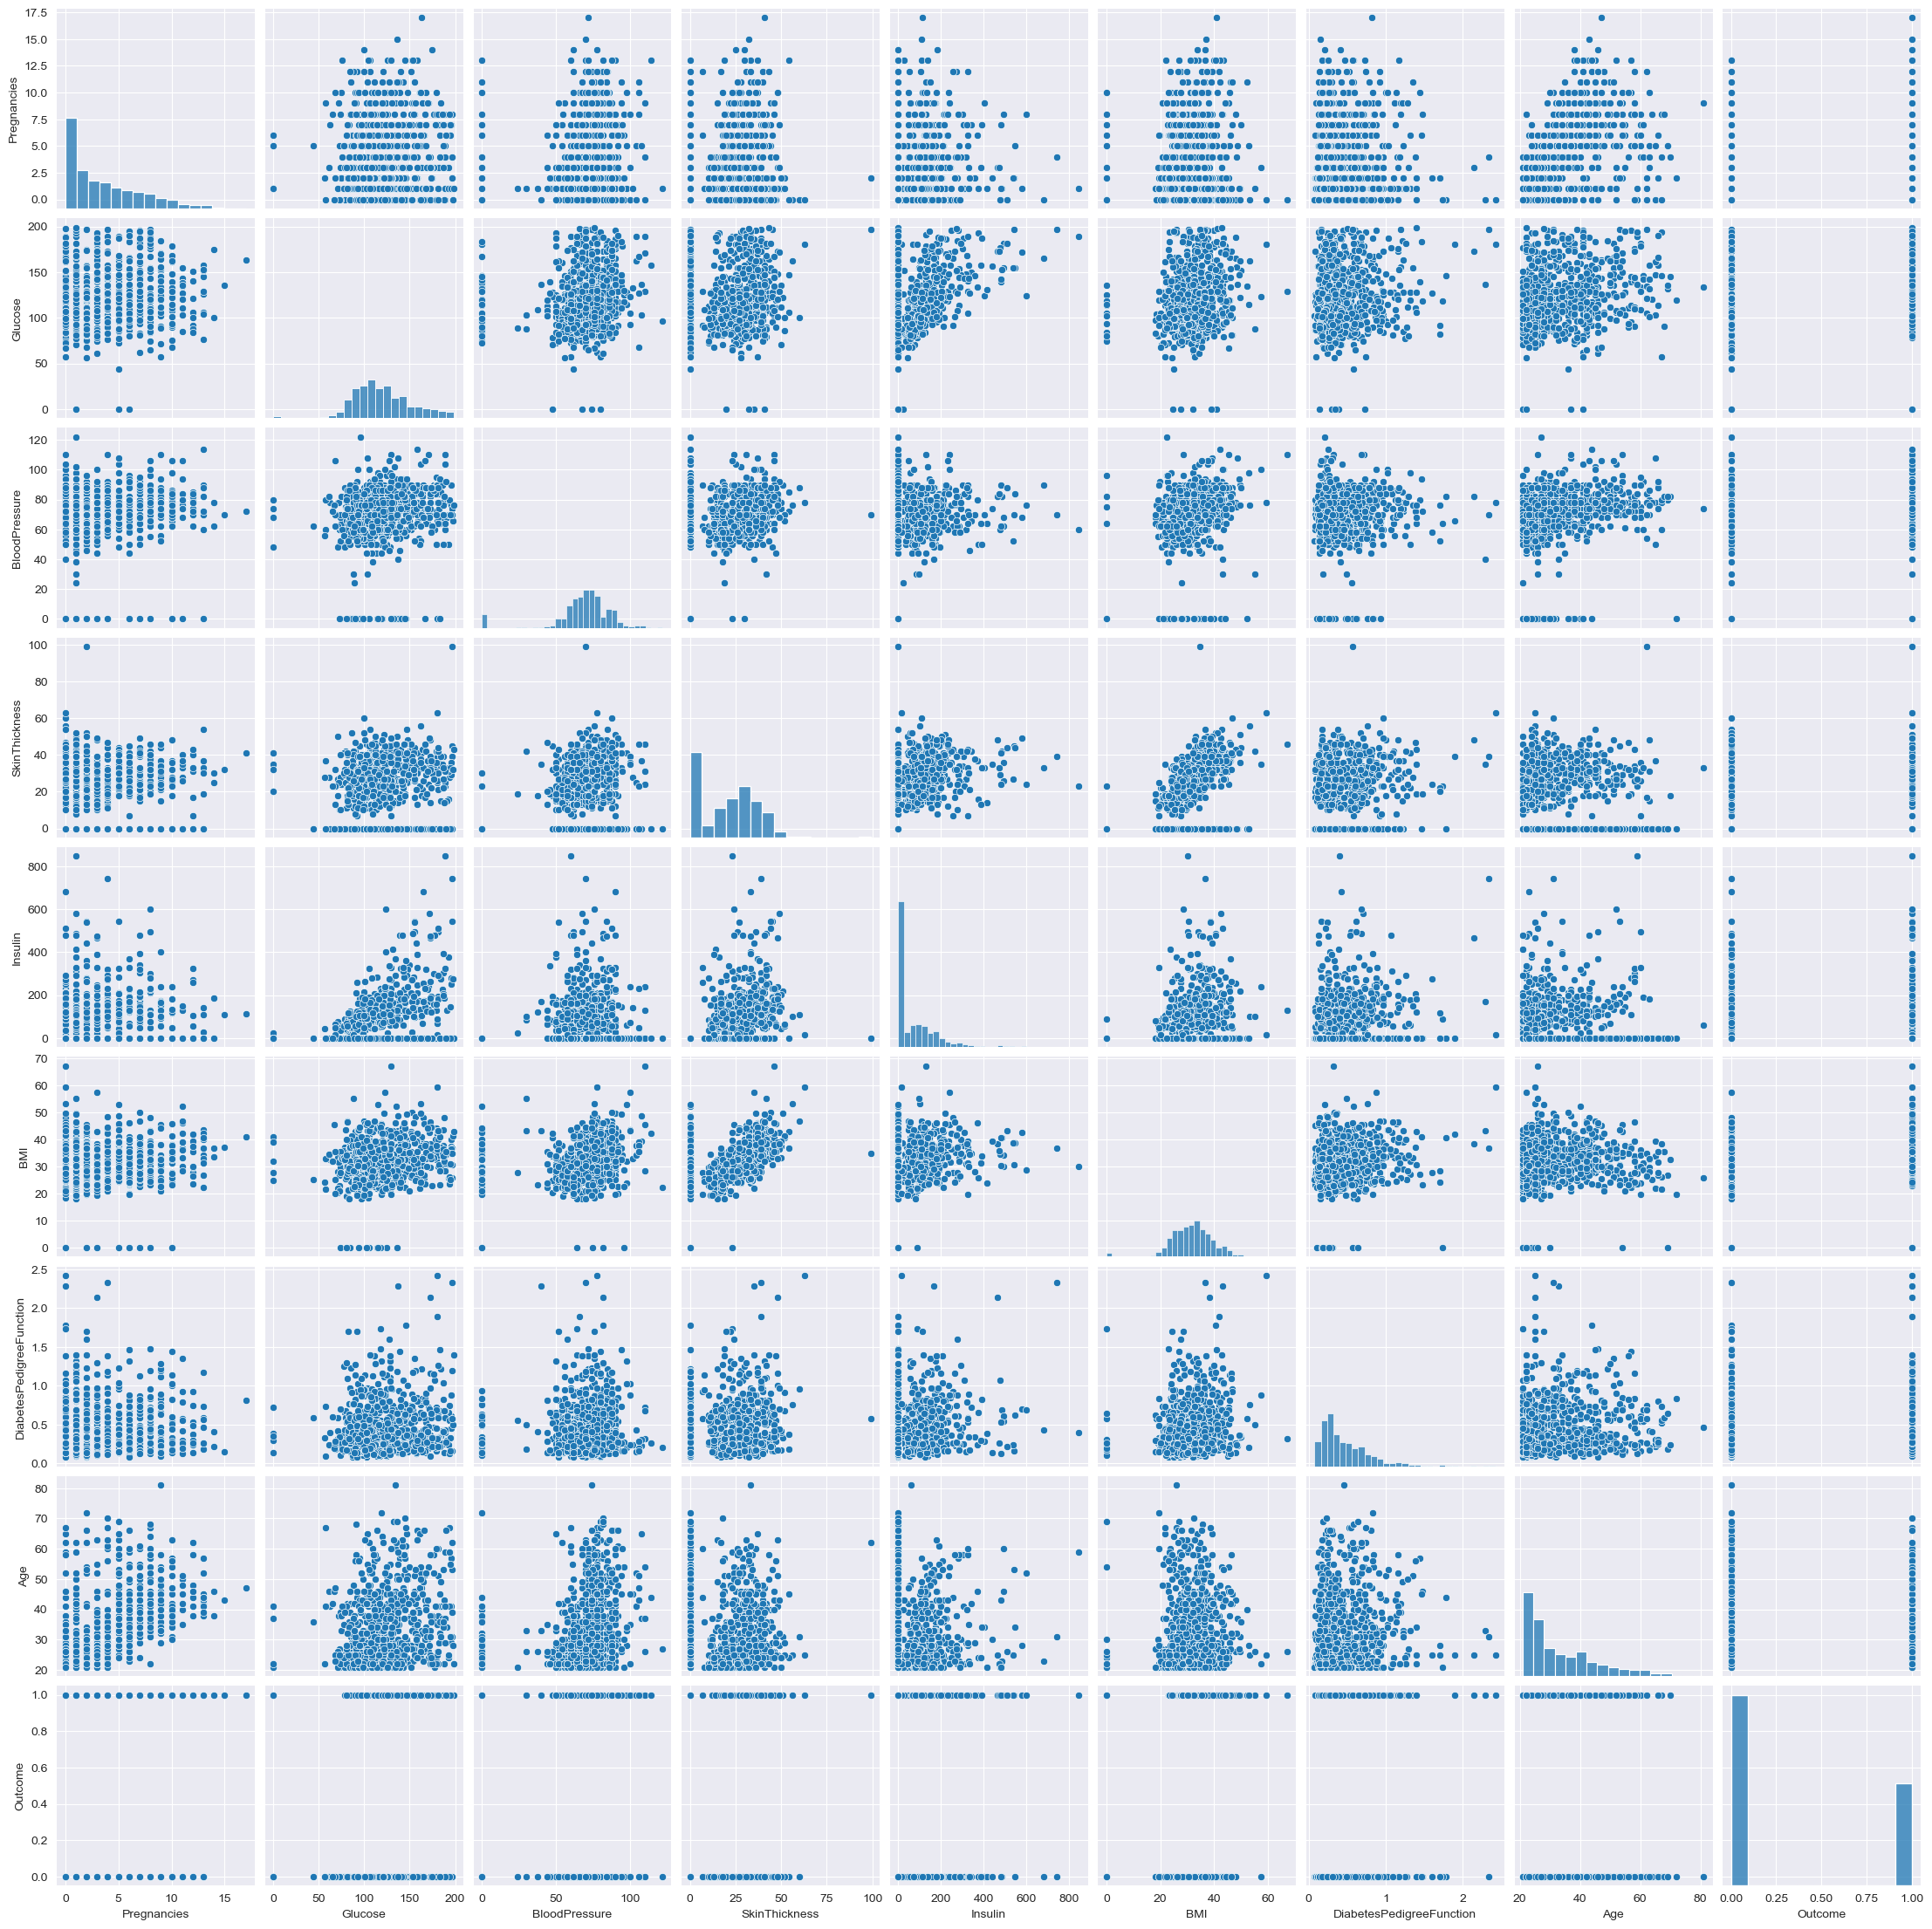

In [62]:
sns.pairplot(df)

In [63]:
df.isnull().sum()

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [64]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
444,4.0,117,62,12.0,0,29.7,0.380,30,1
594,6.0,123,72,45.0,230,33.6,0.733,34,0
210,2.0,81,60,22.0,0,27.7,0.290,25,0
231,6.0,134,80,37.0,370,46.2,0.238,46,1
742,1.0,109,58,18.0,116,28.5,0.219,22,0


<Axes: >

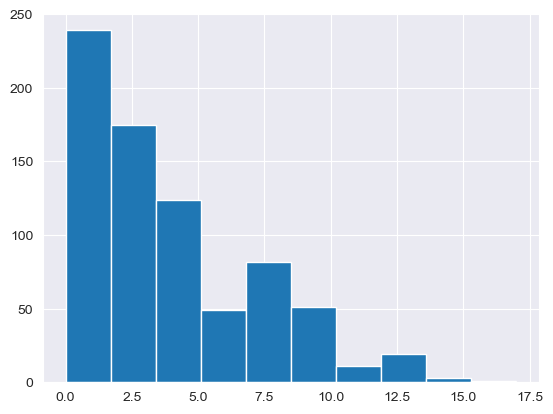

In [65]:
df["Pregnancies"].hist()

In [66]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df["Pregnancies"] = imputer.fit_transform(df["Pregnancies"].values.reshape(-1,1))

imputer = SimpleImputer(strategy="median")
df["SkinThickness"] = imputer.fit_transform(df["SkinThickness"].values.reshape(-1, 1))

imputer = SimpleImputer(strategy="median")
df["BMI"] = imputer.fit_transform(df["BMI"].values.reshape(-1, 1))

In [67]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

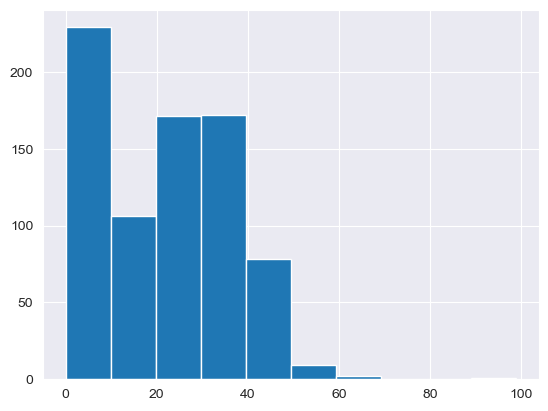

In [68]:
df.SkinThickness.hist()

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [71]:
#add your code
df.to_csv('data_new.csv', index=False)


Print the first rows of your final Dataset

In [72]:

data_new = pd.read_csv('./data_new.csv')
data_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


In [ ]:
#add your code

# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [76]:
#add your code
X = df.drop("Outcome",axis=1)
Y = df["Outcome"]

In [78]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [106]:
#add your code
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

mydic = {}

for i in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    mydic[i] = accuracy_score(model.predict(X_test),Y_test)

mydic
    

{1: 0.7207792207792207,
 3: 0.6948051948051948,
 5: 0.7337662337662337,
 7: 0.7272727272727273,
 9: 0.7402597402597403,
 11: 0.7532467532467533,
 13: 0.7727272727272727,
 15: 0.7662337662337663,
 17: 0.7727272727272727,
 19: 0.7597402597402597}

In [107]:
model = KNeighborsClassifier(n_neighbors=13)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=13)

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [108]:
#add your code
Y_pred = model.predict(X_test)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [83]:
#add your code

In [109]:
from sklearn.metrics import f1_score,classification_report,accuracy_score

In [110]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        92
           1       0.83      0.55      0.66        62

    accuracy                           0.77       154
   macro avg       0.79      0.74      0.74       154
weighted avg       0.78      0.77      0.76       154



In [111]:
print(accuracy_score(Y_test,Y_pred))

0.7727272727272727


In [112]:
Y.unique()

array([1, 0])

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[85,  7],
       [28, 34]])